In [41]:
import pandas as pd
extract_csv = pd.read_csv("experiment_data_final.csv")
extract_csv.head(100)

,program_name,threads,width,l1_cache,l2_cache,l3_cache,committed_instructions_per_cycle,branch_prediction_accuracy,instructions,accesses_mod_shared_mm,...,writes_mod_shared_l3,hw_threads,cycles,dispatch_ipc,issue_ipc,commit_total,commit_ipc,commit_pred_acc,issue_commit_totals_diff,dispatch_issue_totals_diff
0,raytrace,8,4,64k,1m,16m,NaN,NaN,NaN,153172,...,90917,16,5162965136,0.7986,0.7507,3601320852,0.6975,0.9427,274396619,247322180
1,raytrace,8,4,32k,1m,16m,NaN,NaN,NaN,604276,...,344386,16,13815380707,0.7792,0.7278,9334925693,0.6757,0.9411,719915356,710294321
2,raytrace,8,4,32k,2m,32m,NaN,NaN,NaN,2249433,...,1340272,16,31009448393,0.7810,0.6824,19379657571,0.6250,0.9194,1781152056,3058017744
3,raytrace,8,4,64k,2m,32m,NaN,NaN,NaN,1464840,...,878197,16,24088271698,0.7896,0.7000,15494060522,0.6432,0.9236,1368437026,2156605493
4,swaptions,8,4,64k,1m,32m,2.2680,0.8384,5.034279e+09,10710,...,7098,16,1527718090,4.8170,4.6460,7028781289,4.6010,0.8384,69165568,260383915
5,swaptions,8,4,32k,2m,32m,2.0280,0.8384,5.034183e+09,10583,...,7099,16,1708237934,4.3070,4.1550,7028781289,4.1150,0.8384,69183043,260256807
6,swaptions,8,4,64k,2m,32m,2.2730,0.8385,5.033521e+09,9813,...,7100,16,1524272911,4.8270,4.6570,7028781270,4.6110,0.8385,69161774,260284418
7,swaptions,8,8,32k,2m,32m,NaN,NaN,NaN,8891,...,7027,16,940791972,5.7160,5.3780,4989806826,5.3040,0.8378,70004477,317608994
8,swaptions,8,4,32k,1m,32m,2.0280,0.8384,5.034183e+09,10583,...,7099,16,1708237934,4.3070,4.1550,7028781289,4.1150,0.8384,69183043,260256807
9,swaptions,8,4,64k,1m,16m,2.2680,0.8384,5.034279e+09,10710,...,7098,16,1527718090,4.8170,4.6460,7028781289,4.6010,0.8384,69165568,260383915


In [42]:
import numpy as np

In [43]:
#Make column 'width' a string
extract_csv['width'] = extract_csv['width'].apply(str)

In [44]:
extract_csv_numerical = extract_csv.select_dtypes(include=[np.number])
extract_csv_numerical.head()

,threads,committed_instructions_per_cycle,branch_prediction_accuracy,instructions,accesses_mod_shared_mm,accesses_mod_shared_l3,hits_mod_shared_l3,misses_mod_shared_l3,reads_mod_shared_l3,writes_mod_shared_l3,hw_threads,cycles,dispatch_ipc,issue_ipc,commit_total,commit_ipc,commit_pred_acc,issue_commit_totals_diff,dispatch_issue_totals_diff
0,8,NaN,NaN,NaN,153172,360192,8149,352043,70404,90917,16,5162965136,0.7986,0.7507,3601320852,0.6975,0.9427,274396619,247322180
1,8,NaN,NaN,NaN,604276,1471215,29999,1441216,289889,344386,16,13815380707,0.7792,0.7278,9334925693,0.6757,0.9411,719915356,710294321
2,8,NaN,NaN,NaN,2249433,5288573,26549,5262024,935710,1340272,16,31009448393,0.7810,0.6824,19379657571,0.6250,0.9194,1781152056,3058017744
3,8,NaN,NaN,NaN,1464840,3399469,23032,3376437,609675,878197,16,24088271698,0.7896,0.7000,15494060522,0.6432,0.9236,1368437026,2156605493
4,8,2.268,0.8384,5.034279e+09,10710,12562,1689,10873,5301,7098,16,1527718090,4.8170,4.6460,7028781289,4.6010,0.8384,69165568,260383915


In [45]:
def eda_numerical(input_data):
    features = list(input_data)
    dict_output_data = {"variable":[],
                        "number_nan":[],
                        "number_distinct":[],
                        "mean":[],
                        "max":[],
                        "min":[],
                        "std":[],
                        "perc25":[],
                        "perc50":[],
                        "perc75":[]
                       }
    for feature in features:
        dict_output_data["variable"].append(feature)
        dict_output_data["number_nan"].append(input_data[feature].isna().sum())
        dict_output_data["number_distinct"].append(input_data[feature].nunique())
        dict_output_data["mean"].append(input_data[feature].mean())
        dict_output_data["max"].append(input_data[feature].max())
        dict_output_data["min"].append(input_data[feature].min())
        dict_output_data["std"].append(input_data[feature].std())
        dict_output_data["perc25"].append(input_data[feature].quantile(.25))
        dict_output_data["perc50"].append(input_data[feature].quantile(.50))
        dict_output_data["perc75"].append(input_data[feature].quantile(.75))
    output_data = pd.DataFrame(dict_output_data)
    return output_data

In [46]:
eda_numerical(extract_csv_numerical)

,variable,number_nan,number_distinct,mean,max,min,std,perc25,perc50,perc75
0,threads,0,1,8.000000e+00,8.000000e+00,8.000000e+00,0.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
1,committed_instructions_per_cycle,13,10,1.336156e+00,2.273000e+00,8.705000e-01,5.770632e-01,8.712000e-01,9.922000e-01,2.028000e+00
2,branch_prediction_accuracy,13,6,9.219760e-01,9.693000e-01,8.384000e-01,5.854931e-02,8.385000e-01,9.600000e-01,9.604000e-01
3,instructions,13,13,2.408596e+09,8.025928e+09,2.594862e+08,2.795062e+09,2.594868e+08,2.596326e+08,5.034183e+09
4,accesses_mod_shared_mm,0,20,7.804804e+05,4.490318e+06,8.891000e+03,1.419480e+06,1.009800e+04,1.037200e+04,7.486330e+05
5,accesses_mod_shared_l3,0,24,1.731199e+06,8.976851e+06,1.038300e+04,3.044462e+06,1.286800e+04,1.291150e+04,1.839909e+06
6,hits_mod_shared_l3,0,22,5.207974e+04,4.813980e+05,1.450000e+03,1.228972e+05,2.723000e+03,2.740000e+03,2.286875e+04
7,misses_mod_shared_l3,0,23,1.679119e+06,8.957287e+06,8.933000e+03,2.973641e+06,1.018200e+04,1.045000e+04,1.772611e+06
8,reads_mod_shared_l3,0,24,6.246381e+05,4.171067e+06,3.314000e+03,1.280958e+06,7.795000e+03,7.868500e+03,5.297285e+05
9,writes_mod_shared_l3,0,24,2.079221e+05,1.340272e+06,5.015000e+03,3.851416e+05,5.030500e+03,7.098500e+03,2.942758e+05


In [47]:
extract_csv_string = extract_csv.select_dtypes(exclude=[np.number])
extract_csv_string.head()

,program_name,width,l1_cache,l2_cache,l3_cache
0,raytrace,4,64k,1m,16m
1,raytrace,4,32k,1m,16m
2,raytrace,4,32k,2m,32m
3,raytrace,4,64k,2m,32m
4,swaptions,4,64k,1m,32m


In [48]:
def eda_string(input_data):
    features = list(input_data)
    dict_output_data = {"variable":[],
                        "number_nan":[],
                        "number_distinct":[]
                       }
    for feature in features:
        dict_output_data["variable"].append(feature)
        dict_output_data["number_nan"].append(input_data[feature].isna().sum())
        dict_output_data["number_distinct"].append(input_data[feature].nunique())
    output_data = pd.DataFrame(dict_output_data)
    return output_data

In [49]:
eda_string(extract_csv_string)

,variable,number_nan,number_distinct
0,program_name,0,5
1,width,0,2
2,l1_cache,0,2
3,l2_cache,0,2
4,l3_cache,0,2


# Missing at random?
We will compare the distributions of the extracts with and without missing value (rows).

In [50]:
miss_filter = eda_numerical(extract_csv_numerical)['number_nan'] > 0
print(eda_numerical(extract_csv_numerical)[miss_filter].variable)

1    committed_instructions_per_cycle
2          branch_prediction_accuracy
3                        instructions
Name: variable, dtype: object


In [51]:
vars_with_missing = list(eda_numerical(extract_csv_numerical)[miss_filter].variable)
for var in vars_with_missing:
    miss_column = extract_csv_numerical[var]
    only_na = extract_csv_numerical[miss_column.isna()]
    print(eda_numerical(only_na))

                            variable  number_nan  number_distinct  \
0                            threads           0                1   
1   committed_instructions_per_cycle          13                0   
2         branch_prediction_accuracy          13                0   
3                       instructions          13                0   
4             accesses_mod_shared_mm           0               12   
5             accesses_mod_shared_l3           0               12   
6                 hits_mod_shared_l3           0               12   
7               misses_mod_shared_l3           0               12   
8                reads_mod_shared_l3           0               12   
9               writes_mod_shared_l3           0               12   
10                        hw_threads           0                1   
11                            cycles           0               12   
12                      dispatch_ipc           0               12   
13                         issue_i

The fields with missing values seem to be missing at random, since other fields change dramatically after excluding non-missing values. Since they are missing at random, we could impute via mean or median by groups.

We consider the standard deviations of all three variables with missing variables to be high, so we will impute by medians (labeled 'perc50' above).

# New Dataset without missing values

In [52]:
#extract_csv
miss_filter = eda_numerical(extract_csv_numerical)['number_nan'] > 0
vars_with_missing = list(eda_numerical(extract_csv_numerical)[miss_filter].variable)
extract_csv[vars_with_missing].head()

,committed_instructions_per_cycle,branch_prediction_accuracy,instructions
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,2.268,0.8384,5.034279e+09


In [53]:
# Creating filter of which to impute by median - Part 1
CIPC_filter = extract_csv.groupby('program_name')['committed_instructions_per_cycle'].\
apply(lambda x: x.notnull().sum()/len(x)*100).reset_index(name='percent')

BPA_filter = extract_csv.groupby('program_name')['branch_prediction_accuracy'].\
apply(lambda x: x.notnull().sum()/len(x)*100).reset_index(name='percent')

I_filter = extract_csv.groupby('program_name')['instructions'].\
apply(lambda x: x.notnull().sum()/len(x)*100).reset_index(name='percent')

print(CIPC_filter, BPA_filter, I_filter)

   program_name    percent
0  blackscholes  93.750000
1       canneal   0.000000
2  fluidanimate  66.666667
3      raytrace   0.000000
4     swaptions  88.888889    program_name    percent
0  blackscholes  93.750000
1       canneal   0.000000
2  fluidanimate  66.666667
3      raytrace   0.000000
4     swaptions  88.888889    program_name    percent
0  blackscholes  93.750000
1       canneal   0.000000
2  fluidanimate  66.666667
3      raytrace   0.000000
4     swaptions  88.888889


In [54]:
# Creating filter of which to impute by median - Part 2
# When the program is the below row, we will use the calculated value confirmed by Dr. Zahran, else we will 
# impute by group median.
CIPC_filter2 = CIPC_filter["program_name"][CIPC_filter['percent']==0].reset_index(name='program_name')
BPA_filter2 = BPA_filter["program_name"][BPA_filter['percent']==0].reset_index(name='program_name')
I_filter2 = I_filter["program_name"][I_filter['percent']==0].reset_index(name='program_name')
CIPC_filter3 = list(CIPC_filter2['program_name'])
BPA_filter3 = list(BPA_filter2['program_name'])
I_filter3 = list(I_filter2['program_name'])
print(CIPC_filter3, BPA_filter3, I_filter3)

['canneal', 'raytrace'] ['canneal', 'raytrace'] ['canneal', 'raytrace']


In [55]:
# Filling in committed_instructions_per_cycle
#in
extract_csv.loc[extract_csv['program_name'].isin(CIPC_filter3) & extract_csv['committed_instructions_per_cycle'].isna(), 'committed_instructions_per_cycle'] = (extract_csv['commit_total'] / extract_csv['cycles'])
# not in (Use ~)
#extract_csv.loc[~(extract_csv['program_name'].isin(CIPC_filter3)) & extract_csv['committed_instructions_per_cycle'].isna(), 'committed_instructions_per_cycle'] = (extract_csv['commit_total'] / extract_csv['cycles'])

In [56]:
extract_csv

,program_name,threads,width,l1_cache,l2_cache,l3_cache,committed_instructions_per_cycle,branch_prediction_accuracy,instructions,accesses_mod_shared_mm,...,writes_mod_shared_l3,hw_threads,cycles,dispatch_ipc,issue_ipc,commit_total,commit_ipc,commit_pred_acc,issue_commit_totals_diff,dispatch_issue_totals_diff
0,raytrace,8,4,64k,1m,16m,0.697530,NaN,NaN,153172,...,90917,16,5162965136,0.7986,0.7507,3601320852,0.6975,0.9427,274396619,247322180
1,raytrace,8,4,32k,1m,16m,0.675691,NaN,NaN,604276,...,344386,16,13815380707,0.7792,0.7278,9334925693,0.6757,0.9411,719915356,710294321
2,raytrace,8,4,32k,2m,32m,0.624960,NaN,NaN,2249433,...,1340272,16,31009448393,0.7810,0.6824,19379657571,0.6250,0.9194,1781152056,3058017744
3,raytrace,8,4,64k,2m,32m,0.643220,NaN,NaN,1464840,...,878197,16,24088271698,0.7896,0.7000,15494060522,0.6432,0.9236,1368437026,2156605493
4,swaptions,8,4,64k,1m,32m,2.268000,0.8384,5.034279e+09,10710,...,7098,16,1527718090,4.8170,4.6460,7028781289,4.6010,0.8384,69165568,260383915
5,swaptions,8,4,32k,2m,32m,2.028000,0.8384,5.034183e+09,10583,...,7099,16,1708237934,4.3070,4.1550,7028781289,4.1150,0.8384,69183043,260256807
6,swaptions,8,4,64k,2m,32m,2.273000,0.8385,5.033521e+09,9813,...,7100,16,1524272911,4.8270,4.6570,7028781270,4.6110,0.8385,69161774,260284418
7,swaptions,8,8,32k,2m,32m,NaN,NaN,NaN,8891,...,7027,16,940791972,5.7160,5.3780,4989806826,5.3040,0.8378,70004477,317608994
8,swaptions,8,4,32k,1m,32m,2.028000,0.8384,5.034183e+09,10583,...,7099,16,1708237934,4.3070,4.1550,7028781289,4.1150,0.8384,69183043,260256807
9,swaptions,8,4,64k,1m,16m,2.268000,0.8384,5.034279e+09,10710,...,7098,16,1527718090,4.8170,4.6460,7028781289,4.6010,0.8384,69165568,260383915


In [57]:
CIPC_filter4 = CIPC_filter["program_name"][CIPC_filter['percent']!=0].reset_index(name='program_name')
BPA_filter4 = BPA_filter["program_name"][BPA_filter['percent']!=0].reset_index(name='program_name')
I_filter4 = I_filter["program_name"][I_filter['percent']!=0].reset_index(name='program_name')
CIPC_filter5 = list(CIPC_filter4['program_name'])
BPA_filter5 = list(BPA_filter4['program_name'])
I_filter5 = list(I_filter4['program_name'])
print(CIPC_filter5, BPA_filter5, I_filter5)

['blackscholes', 'fluidanimate', 'swaptions'] ['blackscholes', 'fluidanimate', 'swaptions'] ['blackscholes', 'fluidanimate', 'swaptions']


In [58]:
median_df = extract_csv[extract_csv['program_name'].isin(CIPC_filter5)].groupby('program_name')['committed_instructions_per_cycle'].\
apply(lambda x: x.median()).reset_index(name='median')
print(median_df)

   program_name  median
0  blackscholes  0.9914
1  fluidanimate  1.0895
2     swaptions  2.1480


In [59]:
extract_csv.loc[extract_csv['program_name'].isin(['blackscholes']) & extract_csv['committed_instructions_per_cycle'].isna() , 'committed_instructions_per_cycle'] = median_df[median_df['program_name'] == 'blackscholes']['median'][0]
#extract_csv.loc[extract_csv['program_name'].isin(['fluidanimate']) & extract_csv['committed_instructions_per_cycle'].isna() , 'committed_instructions_per_cycle'] = median_df[median_df['program_name'] == 'fluidanimate']['median'][0]
#extract_csv.loc[extract_csv['program_name'].isin(['swaptions']) & extract_csv['committed_instructions_per_cycle'].isna() , 'committed_instructions_per_cycle'] = median_df[median_df['program_name'] == 'swaptions']['median'][0]

In [60]:
extract_csv.loc[extract_csv['program_name'].isin(['fluidanimate']) & extract_csv['committed_instructions_per_cycle'].isna() , 'committed_instructions_per_cycle'] = 1.0895

In [61]:
extract_csv.loc[extract_csv['program_name'].isin(['swaptions']) & extract_csv['committed_instructions_per_cycle'].isna() , 'committed_instructions_per_cycle'] = 2.1480

In [62]:
extract_csv

,program_name,threads,width,l1_cache,l2_cache,l3_cache,committed_instructions_per_cycle,branch_prediction_accuracy,instructions,accesses_mod_shared_mm,...,writes_mod_shared_l3,hw_threads,cycles,dispatch_ipc,issue_ipc,commit_total,commit_ipc,commit_pred_acc,issue_commit_totals_diff,dispatch_issue_totals_diff
0,raytrace,8,4,64k,1m,16m,0.697530,NaN,NaN,153172,...,90917,16,5162965136,0.7986,0.7507,3601320852,0.6975,0.9427,274396619,247322180
1,raytrace,8,4,32k,1m,16m,0.675691,NaN,NaN,604276,...,344386,16,13815380707,0.7792,0.7278,9334925693,0.6757,0.9411,719915356,710294321
2,raytrace,8,4,32k,2m,32m,0.624960,NaN,NaN,2249433,...,1340272,16,31009448393,0.7810,0.6824,19379657571,0.6250,0.9194,1781152056,3058017744
3,raytrace,8,4,64k,2m,32m,0.643220,NaN,NaN,1464840,...,878197,16,24088271698,0.7896,0.7000,15494060522,0.6432,0.9236,1368437026,2156605493
4,swaptions,8,4,64k,1m,32m,2.268000,0.8384,5.034279e+09,10710,...,7098,16,1527718090,4.8170,4.6460,7028781289,4.6010,0.8384,69165568,260383915
5,swaptions,8,4,32k,2m,32m,2.028000,0.8384,5.034183e+09,10583,...,7099,16,1708237934,4.3070,4.1550,7028781289,4.1150,0.8384,69183043,260256807
6,swaptions,8,4,64k,2m,32m,2.273000,0.8385,5.033521e+09,9813,...,7100,16,1524272911,4.8270,4.6570,7028781270,4.6110,0.8385,69161774,260284418
7,swaptions,8,8,32k,2m,32m,2.148000,NaN,NaN,8891,...,7027,16,940791972,5.7160,5.3780,4989806826,5.3040,0.8378,70004477,317608994
8,swaptions,8,4,32k,1m,32m,2.028000,0.8384,5.034183e+09,10583,...,7099,16,1708237934,4.3070,4.1550,7028781289,4.1150,0.8384,69183043,260256807
9,swaptions,8,4,64k,1m,16m,2.268000,0.8384,5.034279e+09,10710,...,7098,16,1527718090,4.8170,4.6460,7028781289,4.6010,0.8384,69165568,260383915


In [63]:
# branch_prediction_accuracy and commit_pred_acc are the same, so we will drop branch_prediction_accuracy
extract_csv[['branch_prediction_accuracy', 'commit_pred_acc']] 

,branch_prediction_accuracy,commit_pred_acc
0,NaN,0.9427
1,NaN,0.9411
2,NaN,0.9194
3,NaN,0.9236
4,0.8384,0.8384
5,0.8384,0.8384
6,0.8385,0.8385
7,NaN,0.8378
8,0.8384,0.8384
9,0.8384,0.8384


In [64]:
extract_csv.drop(columns=['branch_prediction_accuracy'], inplace=True)
extract_csv

,program_name,threads,width,l1_cache,l2_cache,l3_cache,committed_instructions_per_cycle,instructions,accesses_mod_shared_mm,accesses_mod_shared_l3,...,writes_mod_shared_l3,hw_threads,cycles,dispatch_ipc,issue_ipc,commit_total,commit_ipc,commit_pred_acc,issue_commit_totals_diff,dispatch_issue_totals_diff
0,raytrace,8,4,64k,1m,16m,0.697530,NaN,153172,360192,...,90917,16,5162965136,0.7986,0.7507,3601320852,0.6975,0.9427,274396619,247322180
1,raytrace,8,4,32k,1m,16m,0.675691,NaN,604276,1471215,...,344386,16,13815380707,0.7792,0.7278,9334925693,0.6757,0.9411,719915356,710294321
2,raytrace,8,4,32k,2m,32m,0.624960,NaN,2249433,5288573,...,1340272,16,31009448393,0.7810,0.6824,19379657571,0.6250,0.9194,1781152056,3058017744
3,raytrace,8,4,64k,2m,32m,0.643220,NaN,1464840,3399469,...,878197,16,24088271698,0.7896,0.7000,15494060522,0.6432,0.9236,1368437026,2156605493
4,swaptions,8,4,64k,1m,32m,2.268000,5.034279e+09,10710,12562,...,7098,16,1527718090,4.8170,4.6460,7028781289,4.6010,0.8384,69165568,260383915
5,swaptions,8,4,32k,2m,32m,2.028000,5.034183e+09,10583,12294,...,7099,16,1708237934,4.3070,4.1550,7028781289,4.1150,0.8384,69183043,260256807
6,swaptions,8,4,64k,2m,32m,2.273000,5.033521e+09,9813,11537,...,7100,16,1524272911,4.8270,4.6570,7028781270,4.6110,0.8385,69161774,260284418
7,swaptions,8,8,32k,2m,32m,2.148000,NaN,8891,10383,...,7027,16,940791972,5.7160,5.3780,4989806826,5.3040,0.8378,70004477,317608994
8,swaptions,8,4,32k,1m,32m,2.028000,5.034183e+09,10583,12294,...,7099,16,1708237934,4.3070,4.1550,7028781289,4.1150,0.8384,69183043,260256807
9,swaptions,8,4,64k,1m,16m,2.268000,5.034279e+09,10710,12562,...,7098,16,1527718090,4.8170,4.6460,7028781289,4.6010,0.8384,69165568,260383915


In [65]:
# Filling in instructions
#in
extract_csv.loc[extract_csv['program_name'].isin(I_filter3) & extract_csv['instructions'].isna(), 'instructions'] = extract_csv['commit_total'] 
# not in (Use ~)
#extract_csv.loc[~(extract_csv['program_name'].isin(CIPC_filter3)) & extract_csv['committed_instructions_per_cycle'].isna(), 'committed_instructions_per_cycle'] = (extract_csv['commit_total'] / extract_csv['cycles'])

In [66]:
extract_csv

,program_name,threads,width,l1_cache,l2_cache,l3_cache,committed_instructions_per_cycle,instructions,accesses_mod_shared_mm,accesses_mod_shared_l3,...,writes_mod_shared_l3,hw_threads,cycles,dispatch_ipc,issue_ipc,commit_total,commit_ipc,commit_pred_acc,issue_commit_totals_diff,dispatch_issue_totals_diff
0,raytrace,8,4,64k,1m,16m,0.697530,3.601321e+09,153172,360192,...,90917,16,5162965136,0.7986,0.7507,3601320852,0.6975,0.9427,274396619,247322180
1,raytrace,8,4,32k,1m,16m,0.675691,9.334926e+09,604276,1471215,...,344386,16,13815380707,0.7792,0.7278,9334925693,0.6757,0.9411,719915356,710294321
2,raytrace,8,4,32k,2m,32m,0.624960,1.937966e+10,2249433,5288573,...,1340272,16,31009448393,0.7810,0.6824,19379657571,0.6250,0.9194,1781152056,3058017744
3,raytrace,8,4,64k,2m,32m,0.643220,1.549406e+10,1464840,3399469,...,878197,16,24088271698,0.7896,0.7000,15494060522,0.6432,0.9236,1368437026,2156605493
4,swaptions,8,4,64k,1m,32m,2.268000,5.034279e+09,10710,12562,...,7098,16,1527718090,4.8170,4.6460,7028781289,4.6010,0.8384,69165568,260383915
5,swaptions,8,4,32k,2m,32m,2.028000,5.034183e+09,10583,12294,...,7099,16,1708237934,4.3070,4.1550,7028781289,4.1150,0.8384,69183043,260256807
6,swaptions,8,4,64k,2m,32m,2.273000,5.033521e+09,9813,11537,...,7100,16,1524272911,4.8270,4.6570,7028781270,4.6110,0.8385,69161774,260284418
7,swaptions,8,8,32k,2m,32m,2.148000,NaN,8891,10383,...,7027,16,940791972,5.7160,5.3780,4989806826,5.3040,0.8378,70004477,317608994
8,swaptions,8,4,32k,1m,32m,2.028000,5.034183e+09,10583,12294,...,7099,16,1708237934,4.3070,4.1550,7028781289,4.1150,0.8384,69183043,260256807
9,swaptions,8,4,64k,1m,16m,2.268000,5.034279e+09,10710,12562,...,7098,16,1527718090,4.8170,4.6460,7028781289,4.6010,0.8384,69165568,260383915


In [67]:
median_df = extract_csv[extract_csv['program_name'].isin(I_filter5)].groupby('program_name')['instructions'].\
apply(lambda x: x.median()).reset_index(name='median')
print(median_df)

   program_name        median
0  blackscholes  2.596287e+08
1  fluidanimate  8.024558e+09
2     swaptions  5.034183e+09


In [68]:
extract_csv.loc[extract_csv['program_name'].isin(['blackscholes']) & extract_csv['instructions'].isna() , 'instructions'] = median_df[median_df['program_name'] == 'blackscholes']['median'][0]

In [69]:
extract_csv.loc[extract_csv['program_name'].isin(['fluidanimate']) & extract_csv['instructions'].isna() , 'instructions'] = 8.024558e+09

In [70]:
extract_csv.loc[extract_csv['program_name'].isin(['swaptions']) & extract_csv['instructions'].isna() , 'instructions'] = 5.034183e+09

In [71]:
extract_csv.drop(columns=['commit_total'], inplace=True)
extract_csv

,program_name,threads,width,l1_cache,l2_cache,l3_cache,committed_instructions_per_cycle,instructions,accesses_mod_shared_mm,accesses_mod_shared_l3,...,reads_mod_shared_l3,writes_mod_shared_l3,hw_threads,cycles,dispatch_ipc,issue_ipc,commit_ipc,commit_pred_acc,issue_commit_totals_diff,dispatch_issue_totals_diff
0,raytrace,8,4,64k,1m,16m,0.697530,3.601321e+09,153172,360192,...,70404,90917,16,5162965136,0.7986,0.7507,0.6975,0.9427,274396619,247322180
1,raytrace,8,4,32k,1m,16m,0.675691,9.334926e+09,604276,1471215,...,289889,344386,16,13815380707,0.7792,0.7278,0.6757,0.9411,719915356,710294321
2,raytrace,8,4,32k,2m,32m,0.624960,1.937966e+10,2249433,5288573,...,935710,1340272,16,31009448393,0.7810,0.6824,0.6250,0.9194,1781152056,3058017744
3,raytrace,8,4,64k,2m,32m,0.643220,1.549406e+10,1464840,3399469,...,609675,878197,16,24088271698,0.7896,0.7000,0.6432,0.9236,1368437026,2156605493
4,swaptions,8,4,64k,1m,32m,2.268000,5.034279e+09,10710,12562,...,5301,7098,16,1527718090,4.8170,4.6460,4.6010,0.8384,69165568,260383915
5,swaptions,8,4,32k,2m,32m,2.028000,5.034183e+09,10583,12294,...,5138,7099,16,1708237934,4.3070,4.1550,4.1150,0.8384,69183043,260256807
6,swaptions,8,4,64k,2m,32m,2.273000,5.033521e+09,9813,11537,...,4329,7100,16,1524272911,4.8270,4.6570,4.6110,0.8385,69161774,260284418
7,swaptions,8,8,32k,2m,32m,2.148000,5.034183e+09,8891,10383,...,3314,7027,16,940791972,5.7160,5.3780,5.3040,0.8378,70004477,317608994
8,swaptions,8,4,32k,1m,32m,2.028000,5.034183e+09,10583,12294,...,5138,7099,16,1708237934,4.3070,4.1550,4.1150,0.8384,69183043,260256807
9,swaptions,8,4,64k,1m,16m,2.268000,5.034279e+09,10710,12562,...,5301,7098,16,1527718090,4.8170,4.6460,4.6010,0.8384,69165568,260383915


In [72]:
extract_csv

,program_name,threads,width,l1_cache,l2_cache,l3_cache,committed_instructions_per_cycle,instructions,accesses_mod_shared_mm,accesses_mod_shared_l3,...,reads_mod_shared_l3,writes_mod_shared_l3,hw_threads,cycles,dispatch_ipc,issue_ipc,commit_ipc,commit_pred_acc,issue_commit_totals_diff,dispatch_issue_totals_diff
0,raytrace,8,4,64k,1m,16m,0.697530,3.601321e+09,153172,360192,...,70404,90917,16,5162965136,0.7986,0.7507,0.6975,0.9427,274396619,247322180
1,raytrace,8,4,32k,1m,16m,0.675691,9.334926e+09,604276,1471215,...,289889,344386,16,13815380707,0.7792,0.7278,0.6757,0.9411,719915356,710294321
2,raytrace,8,4,32k,2m,32m,0.624960,1.937966e+10,2249433,5288573,...,935710,1340272,16,31009448393,0.7810,0.6824,0.6250,0.9194,1781152056,3058017744
3,raytrace,8,4,64k,2m,32m,0.643220,1.549406e+10,1464840,3399469,...,609675,878197,16,24088271698,0.7896,0.7000,0.6432,0.9236,1368437026,2156605493
4,swaptions,8,4,64k,1m,32m,2.268000,5.034279e+09,10710,12562,...,5301,7098,16,1527718090,4.8170,4.6460,4.6010,0.8384,69165568,260383915
5,swaptions,8,4,32k,2m,32m,2.028000,5.034183e+09,10583,12294,...,5138,7099,16,1708237934,4.3070,4.1550,4.1150,0.8384,69183043,260256807
6,swaptions,8,4,64k,2m,32m,2.273000,5.033521e+09,9813,11537,...,4329,7100,16,1524272911,4.8270,4.6570,4.6110,0.8385,69161774,260284418
7,swaptions,8,8,32k,2m,32m,2.148000,5.034183e+09,8891,10383,...,3314,7027,16,940791972,5.7160,5.3780,5.3040,0.8378,70004477,317608994
8,swaptions,8,4,32k,1m,32m,2.028000,5.034183e+09,10583,12294,...,5138,7099,16,1708237934,4.3070,4.1550,4.1150,0.8384,69183043,260256807
9,swaptions,8,4,64k,1m,16m,2.268000,5.034279e+09,10710,12562,...,5301,7098,16,1527718090,4.8170,4.6460,4.6010,0.8384,69165568,260383915


# Datatypes

In [73]:
extract_csv.dtypes

program_name                         object
threads                               int64
width                                object
l1_cache                             object
l2_cache                             object
l3_cache                             object
committed_instructions_per_cycle    float64
instructions                        float64
accesses_mod_shared_mm                int64
accesses_mod_shared_l3                int64
hits_mod_shared_l3                    int64
misses_mod_shared_l3                  int64
reads_mod_shared_l3                   int64
writes_mod_shared_l3                  int64
hw_threads                            int64
cycles                                int64
dispatch_ipc                        float64
issue_ipc                           float64
commit_ipc                          float64
commit_pred_acc                     float64
issue_commit_totals_diff              int64
dispatch_issue_totals_diff            int64
dtype: object

# Correlation among the fields
We use Pearson correlation since we have a sample of data.

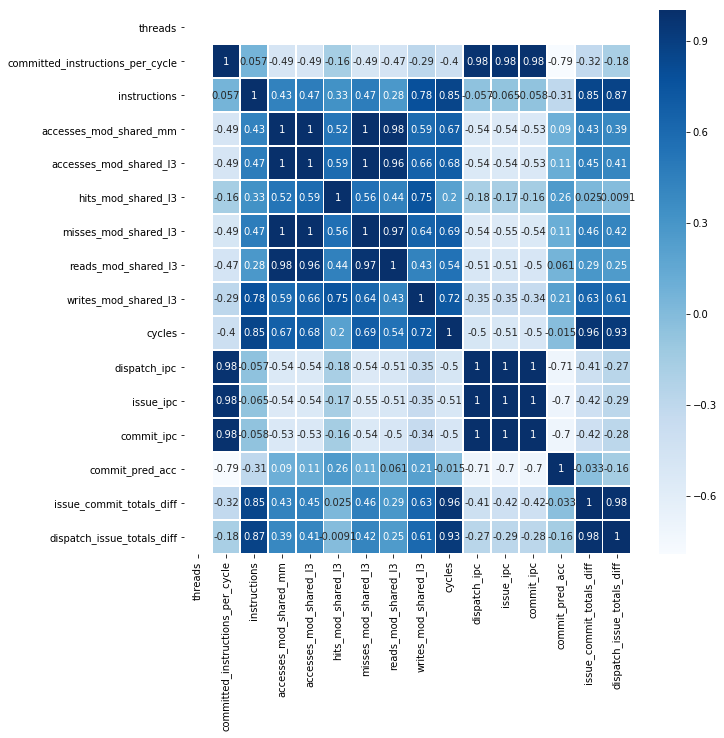

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

extract_csv_numerical = extract_csv.select_dtypes(include=[np.number])
input_cols = [col for col in extract_csv_numerical.columns if col not in ['hw_threads']]
extract_csv_numerical_good = extract_csv_numerical[input_cols]
correlation = extract_csv_numerical_good.corr(method='pearson')

fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(correlation, cmap="Blues", linewidths=.5, annot=True, ax=ax)
plt.show()

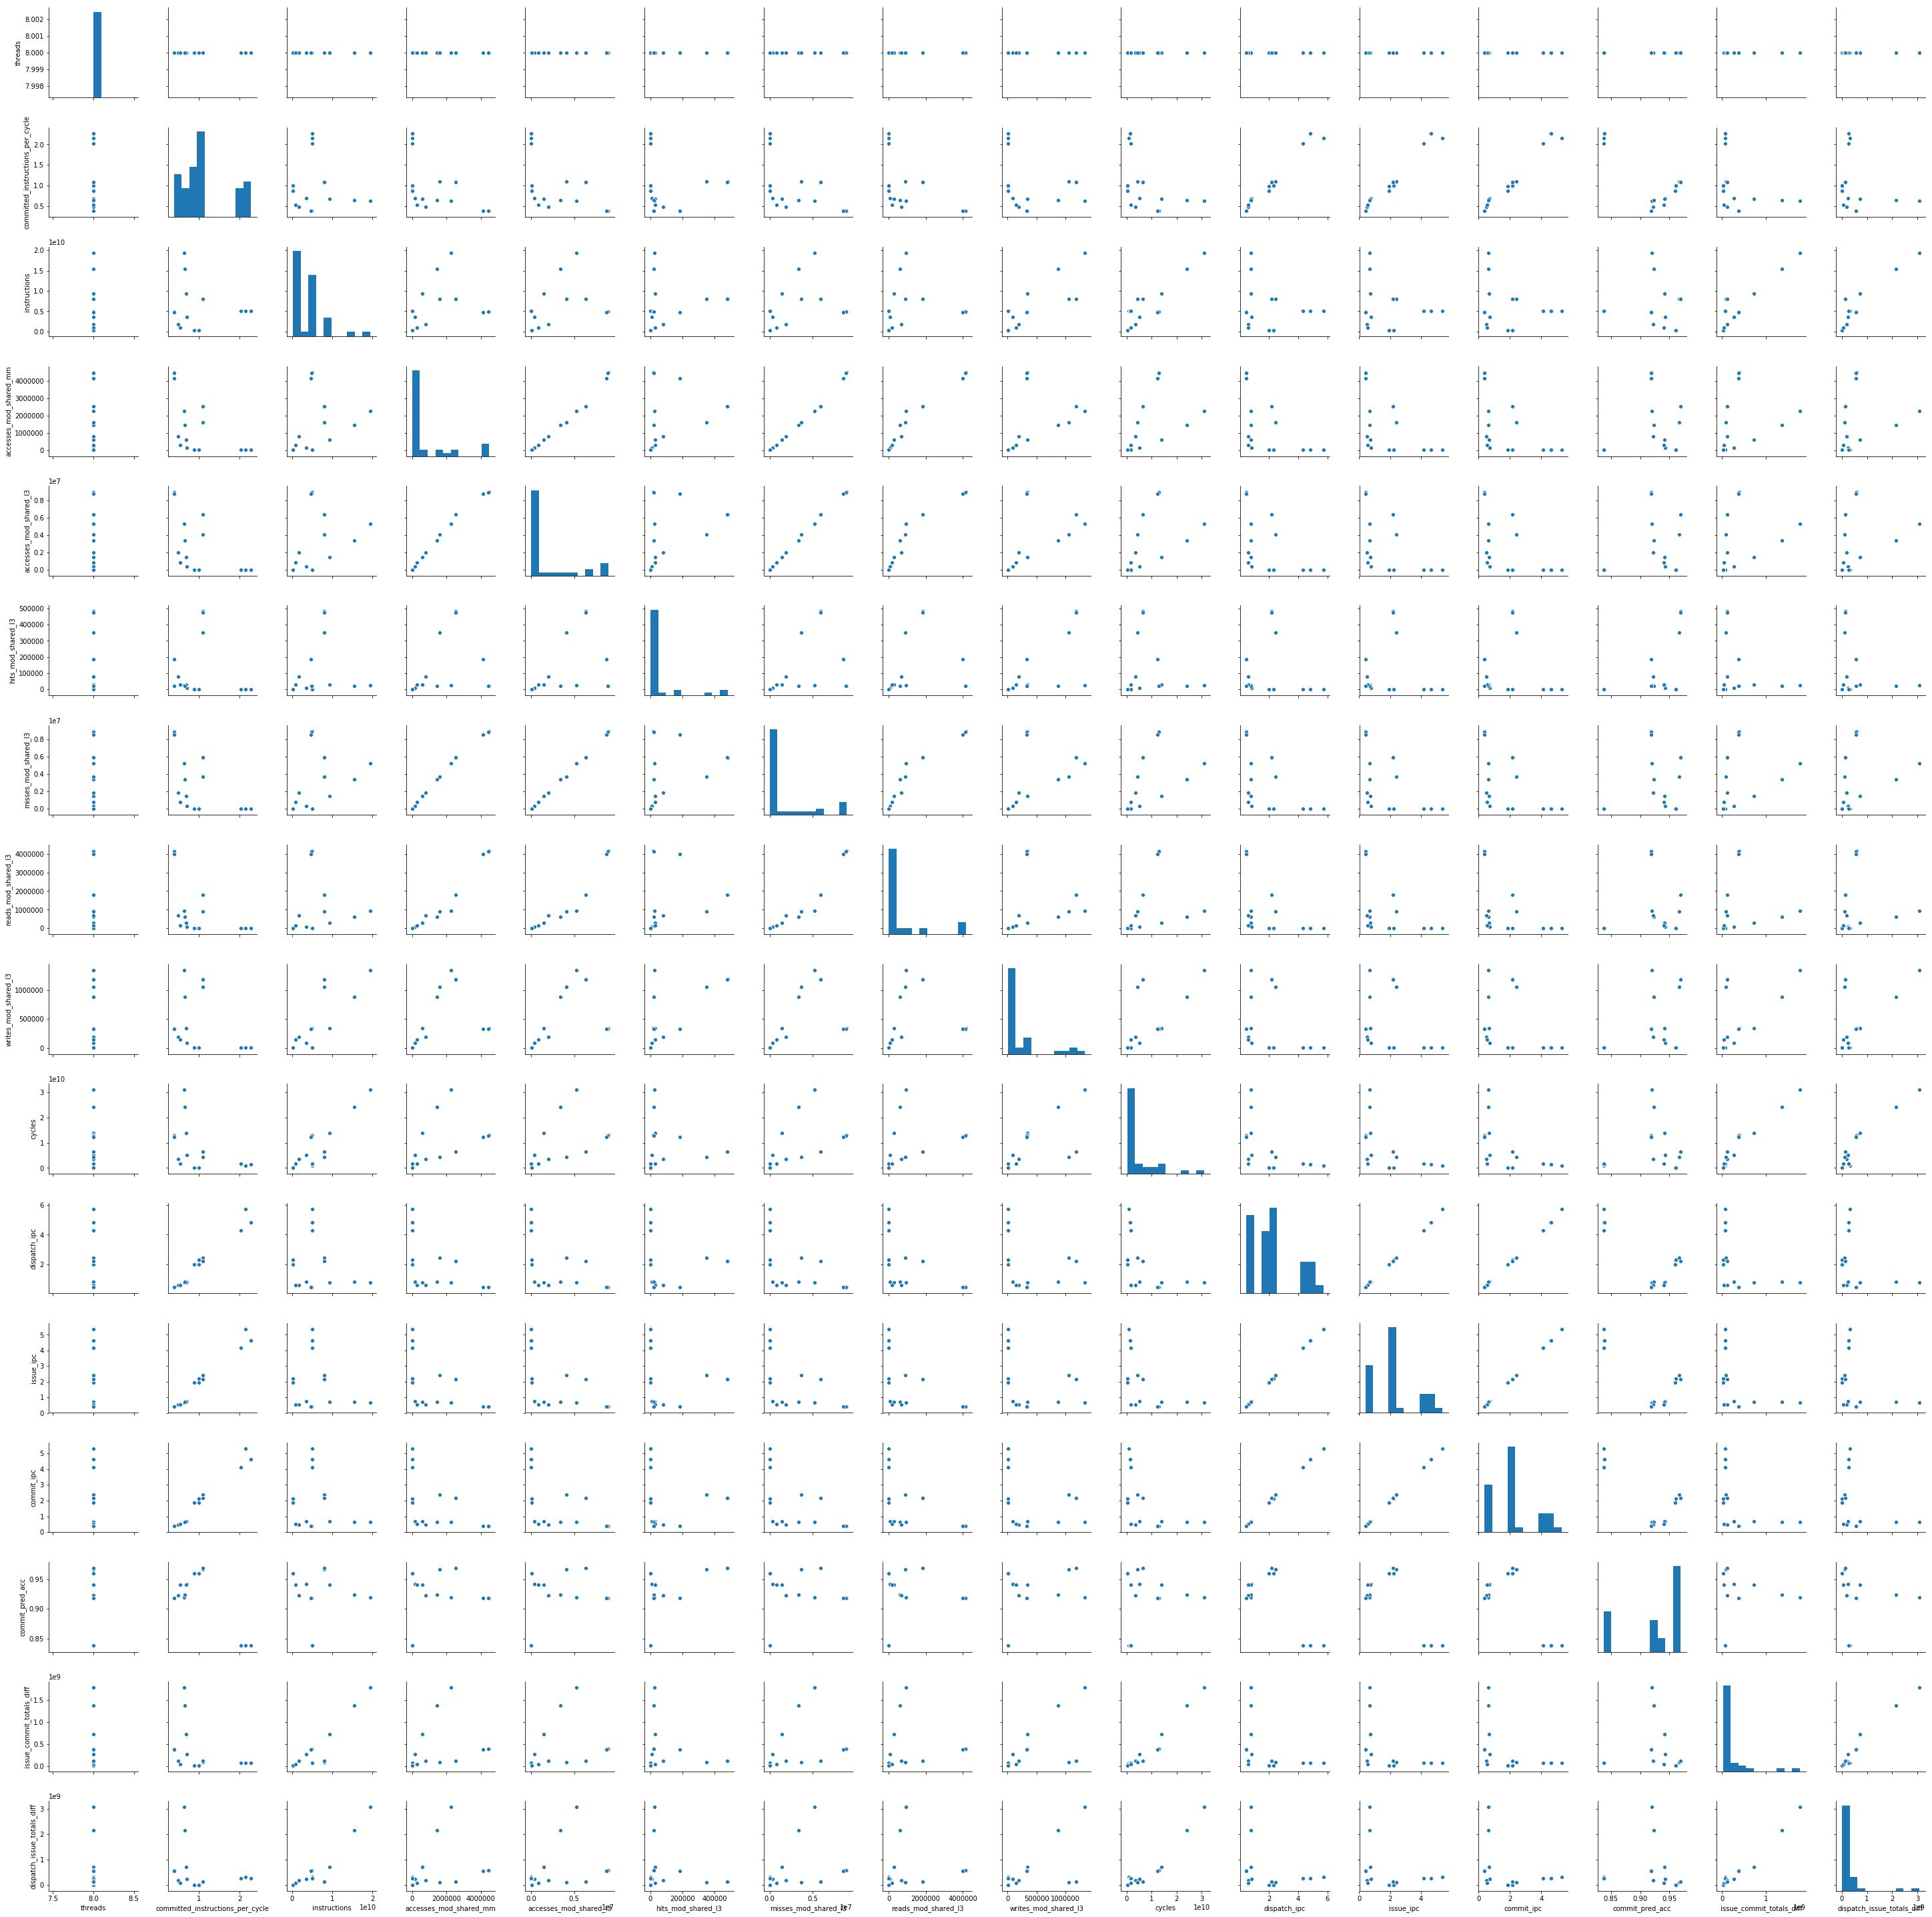

In [75]:
sns.pairplot(extract_csv_numerical_good)

# Check for Normal Distribution

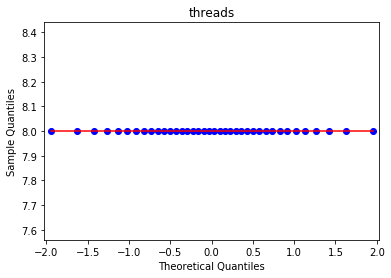

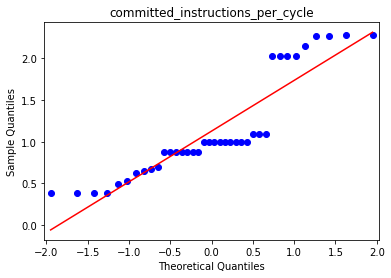

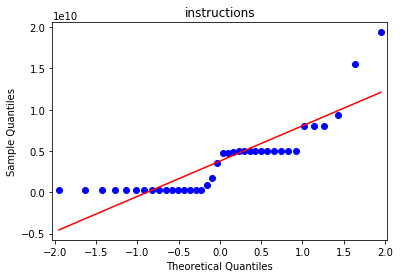

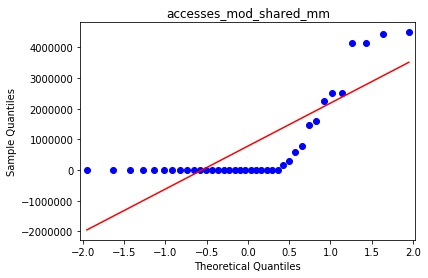

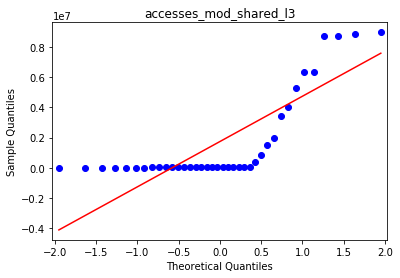

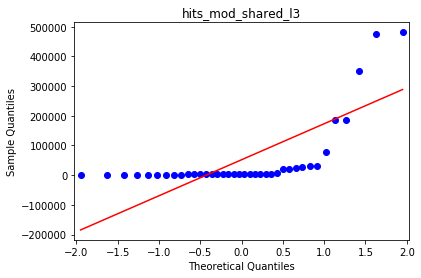

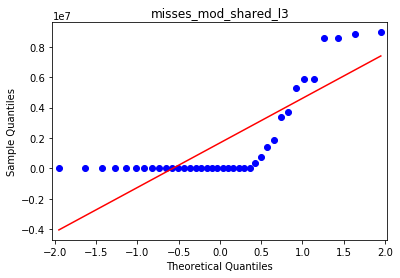

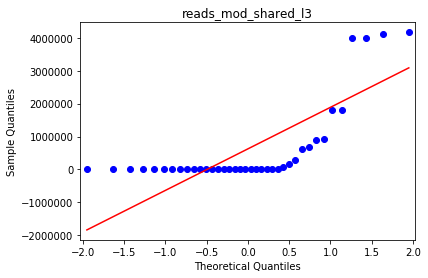

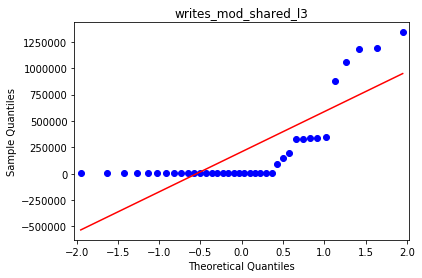

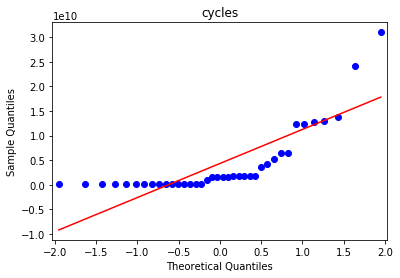

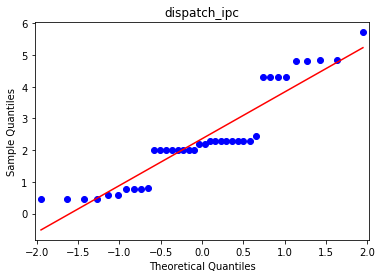

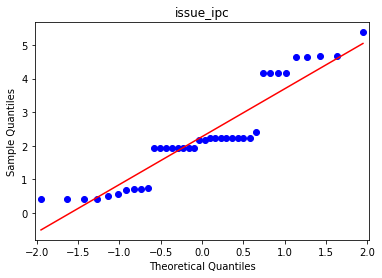

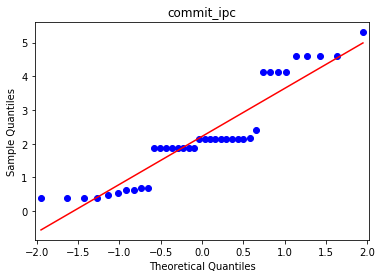

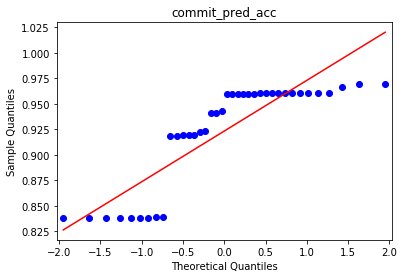

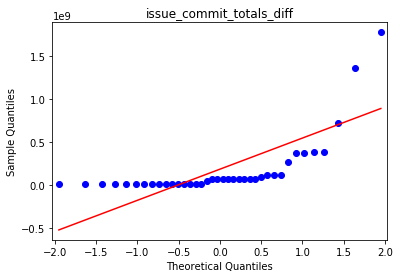

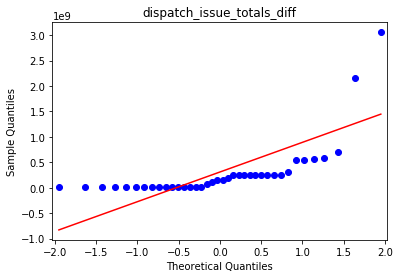

In [76]:
from statsmodels.graphics.gofplots import qqplot
for var in input_cols:
    qqplot(extract_csv_numerical[var], line='s')
    plt.title(var)
    plt.show()

In [77]:
## Since we have a small dataset, we will use the Shapiro-Wilk test for normality
from scipy.stats import shapiro
alpha = 0.05
for var in input_cols:
    _, p = shapiro(extract_csv_numerical[var])
    if p > alpha:
        print(var + ' is Gaussian -- kept null hypothesis')
    else:
        print(var + ' is not Gaussian -- rejected null hypothesis')

threads is Gaussian -- kept null hypothesis
committed_instructions_per_cycle is not Gaussian -- rejected null hypothesis
instructions is not Gaussian -- rejected null hypothesis
accesses_mod_shared_mm is not Gaussian -- rejected null hypothesis
accesses_mod_shared_l3 is not Gaussian -- rejected null hypothesis
hits_mod_shared_l3 is not Gaussian -- rejected null hypothesis
misses_mod_shared_l3 is not Gaussian -- rejected null hypothesis
reads_mod_shared_l3 is not Gaussian -- rejected null hypothesis
writes_mod_shared_l3 is not Gaussian -- rejected null hypothesis
cycles is not Gaussian -- rejected null hypothesis
dispatch_ipc is not Gaussian -- rejected null hypothesis
issue_ipc is not Gaussian -- rejected null hypothesis
commit_ipc is not Gaussian -- rejected null hypothesis
commit_pred_acc is not Gaussian -- rejected null hypothesis
issue_commit_totals_diff is not Gaussian -- rejected null hypothesis
dispatch_issue_totals_diff is not Gaussian -- rejected null hypothesis


/home/anthony/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [78]:
#Binary numerical columns
binary_numerical = eda_numerical(extract_csv_numerical)['number_distinct'] == 2
print(eda_numerical(extract_csv_numerical)[binary_numerical].variable)

Series([], Name: variable, dtype: object)


In [79]:
#Binary string columns
binary_string = eda_string(extract_csv_string)['number_distinct'] == 2
print(eda_string(extract_csv_string)[binary_string].variable)

1       width
2    l1_cache
3    l2_cache
4    l3_cache
Name: variable, dtype: object


# Preparation Section for Models

In [80]:
#Scale the features only, not the dependent variable
from sklearn import preprocessing
extract_csv_numerical2 = extract_csv.select_dtypes(include=[np.number])
input_cols = [col for col in extract_csv_numerical2.columns if col not in ['cycles']]
extract_csv_features_only = extract_csv_numerical2[input_cols]
data_scaled = preprocessing.scale(extract_csv_features_only)
data_scaled_df = pd.DataFrame(data_scaled, columns = input_cols)
data_scaled_df.head()

/home/anthony/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


,threads,committed_instructions_per_cycle,instructions,accesses_mod_shared_mm,accesses_mod_shared_l3,hits_mod_shared_l3,misses_mod_shared_l3,reads_mod_shared_l3,writes_mod_shared_l3,hw_threads,dispatch_ipc,issue_ipc,commit_ipc,commit_pred_acc,issue_commit_totals_diff,dispatch_issue_totals_diff
0,0.0,-0.706834,-0.039454,-0.447860,-0.456373,-0.362257,-0.452270,-0.438479,-0.307876,0.0,-1.058625,-1.068139,-1.068700,0.393163,0.247103,-0.105791
1,0.0,-0.742798,1.301903,-0.125799,-0.086542,-0.182080,-0.081078,-0.264835,0.359078,0.0,-1.071793,-1.084232,-1.084036,0.360986,1.474237,0.686997
2,0.0,-0.826343,3.651833,1.048744,1.184159,-0.210529,1.221062,0.246103,2.979554,0.0,-1.070571,-1.116138,-1.119704,-0.075415,4.397301,4.707210
3,0.0,-0.796271,2.742811,0.488591,0.555324,-0.239531,0.578450,-0.011838,1.763695,0.0,-1.064734,-1.103769,-1.106900,0.009050,3.260521,3.163643
4,0.0,1.879429,0.295782,-0.549570,-0.572090,-0.415527,-0.568542,-0.489985,-0.528429,0.0,1.668937,1.669353,1.677408,-1.704375,-0.318184,-0.083424


In [81]:
extract_csv.update(data_scaled_df)
extract_csv.head(100)

,program_name,threads,width,l1_cache,l2_cache,l3_cache,committed_instructions_per_cycle,instructions,accesses_mod_shared_mm,accesses_mod_shared_l3,...,reads_mod_shared_l3,writes_mod_shared_l3,hw_threads,cycles,dispatch_ipc,issue_ipc,commit_ipc,commit_pred_acc,issue_commit_totals_diff,dispatch_issue_totals_diff
0,raytrace,0.0,4,64k,1m,16m,-0.706834,-0.039454,-0.447860,-0.456373,...,-0.438479,-0.307876,0.0,5162965136,-1.058625,-1.068139,-1.068700,0.393163,0.247103,-0.105791
1,raytrace,0.0,4,32k,1m,16m,-0.742798,1.301903,-0.125799,-0.086542,...,-0.264835,0.359078,0.0,13815380707,-1.071793,-1.084232,-1.084036,0.360986,1.474237,0.686997
2,raytrace,0.0,4,32k,2m,32m,-0.826343,3.651833,1.048744,1.184159,...,0.246103,2.979554,0.0,31009448393,-1.070571,-1.116138,-1.119704,-0.075415,4.397301,4.707210
3,raytrace,0.0,4,64k,2m,32m,-0.796271,2.742811,0.488591,0.555324,...,-0.011838,1.763695,0.0,24088271698,-1.064734,-1.103769,-1.106900,0.009050,3.260521,3.163643
4,swaptions,0.0,4,64k,1m,32m,1.879429,0.295782,-0.549570,-0.572090,...,-0.489985,-0.528429,0.0,1527718090,1.668937,1.669353,1.677408,-1.704375,-0.318184,-0.083424
5,swaptions,0.0,4,32k,2m,32m,1.484195,0.295759,-0.549660,-0.572179,...,-0.490114,-0.528426,0.0,1708237934,1.322765,1.324294,1.335508,-1.704375,-0.318136,-0.083642
6,swaptions,0.0,4,64k,2m,32m,1.887663,0.295605,-0.550210,-0.572431,...,-0.490754,-0.528423,0.0,1524272911,1.675725,1.677083,1.684443,-1.702364,-0.318194,-0.083594
7,swaptions,0.0,8,32k,2m,32m,1.681812,0.295759,-0.550868,-0.572816,...,-0.491557,-0.528615,0.0,940791972,2.279150,2.183779,2.171968,-1.716442,-0.315873,0.014568
8,swaptions,0.0,4,32k,1m,32m,1.484195,0.295759,-0.549660,-0.572179,...,-0.490114,-0.528426,0.0,1708237934,1.322765,1.324294,1.335508,-1.704375,-0.318136,-0.083642
9,swaptions,0.0,4,64k,1m,16m,1.879429,0.295782,-0.549570,-0.572090,...,-0.489985,-0.528429,0.0,1527718090,1.668937,1.669353,1.677408,-1.704375,-0.318184,-0.083424


In [82]:
extract_csv.count()

program_name                        38
threads                             38
width                               38
l1_cache                            38
l2_cache                            38
l3_cache                            38
committed_instructions_per_cycle    38
instructions                        38
accesses_mod_shared_mm              38
accesses_mod_shared_l3              38
hits_mod_shared_l3                  38
misses_mod_shared_l3                38
reads_mod_shared_l3                 38
writes_mod_shared_l3                38
hw_threads                          38
cycles                              38
dispatch_ipc                        38
issue_ipc                           38
commit_ipc                          38
commit_pred_acc                     38
issue_commit_totals_diff            38
dispatch_issue_totals_diff          38
dtype: int64

# One-Hot Encoding Categorical Variables

In [83]:
from numpy import array
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
#left-to-right column order alphabetical

In [84]:
# program_name

values = array(extract_csv['program_name'])
print(values)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

alphabetized_values = list(extract_csv['program_name'].unique())
alphabetized_values.sort()
print(alphabetized_values)

df_program_name = pd.DataFrame(onehot_encoded, columns = alphabetized_values)
df_program_name.head(100)

extract_csv.drop(columns=['program_name'], inplace=True)

idx = 0
for header in alphabetized_values:
    extract_csv.insert(loc=idx, column=header, value=df_program_name[header])
    idx += 1
    
extract_csv.head(100)

['raytrace' 'raytrace' 'raytrace' 'raytrace' 'swaptions' 'swaptions'
 'swaptions' 'swaptions' 'swaptions' 'swaptions' 'swaptions' 'swaptions'
 'swaptions' 'blackscholes' 'blackscholes' 'blackscholes' 'blackscholes'
 'blackscholes' 'blackscholes' 'blackscholes' 'blackscholes'
 'blackscholes' 'blackscholes' 'blackscholes' 'blackscholes'
 'blackscholes' 'blackscholes' 'blackscholes' 'blackscholes' 'canneal'
 'canneal' 'canneal' 'canneal' 'canneal' 'canneal' 'fluidanimate'
 'fluidanimate' 'fluidanimate']
[3 3 3 3 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2
 2]
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 

,blackscholes,canneal,fluidanimate,raytrace,swaptions,threads,width,l1_cache,l2_cache,l3_cache,...,reads_mod_shared_l3,writes_mod_shared_l3,hw_threads,cycles,dispatch_ipc,issue_ipc,commit_ipc,commit_pred_acc,issue_commit_totals_diff,dispatch_issue_totals_diff
0,0.0,0.0,0.0,1.0,0.0,0.0,4,64k,1m,16m,...,-0.438479,-0.307876,0.0,5162965136,-1.058625,-1.068139,-1.068700,0.393163,0.247103,-0.105791
1,0.0,0.0,0.0,1.0,0.0,0.0,4,32k,1m,16m,...,-0.264835,0.359078,0.0,13815380707,-1.071793,-1.084232,-1.084036,0.360986,1.474237,0.686997
2,0.0,0.0,0.0,1.0,0.0,0.0,4,32k,2m,32m,...,0.246103,2.979554,0.0,31009448393,-1.070571,-1.116138,-1.119704,-0.075415,4.397301,4.707210
3,0.0,0.0,0.0,1.0,0.0,0.0,4,64k,2m,32m,...,-0.011838,1.763695,0.0,24088271698,-1.064734,-1.103769,-1.106900,0.009050,3.260521,3.163643
4,0.0,0.0,0.0,0.0,1.0,0.0,4,64k,1m,32m,...,-0.489985,-0.528429,0.0,1527718090,1.668937,1.669353,1.677408,-1.704375,-0.318184,-0.083424
5,0.0,0.0,0.0,0.0,1.0,0.0,4,32k,2m,32m,...,-0.490114,-0.528426,0.0,1708237934,1.322765,1.324294,1.335508,-1.704375,-0.318136,-0.083642
6,0.0,0.0,0.0,0.0,1.0,0.0,4,64k,2m,32m,...,-0.490754,-0.528423,0.0,1524272911,1.675725,1.677083,1.684443,-1.702364,-0.318194,-0.083594
7,0.0,0.0,0.0,0.0,1.0,0.0,8,32k,2m,32m,...,-0.491557,-0.528615,0.0,940791972,2.279150,2.183779,2.171968,-1.716442,-0.315873,0.014568
8,0.0,0.0,0.0,0.0,1.0,0.0,4,32k,1m,32m,...,-0.490114,-0.528426,0.0,1708237934,1.322765,1.324294,1.335508,-1.704375,-0.318136,-0.083642
9,0.0,0.0,0.0,0.0,1.0,0.0,4,64k,1m,16m,...,-0.489985,-0.528429,0.0,1527718090,1.668937,1.669353,1.677408,-1.704375,-0.318184,-0.083424


In [85]:
# l1_cache

values = array(extract_csv['l1_cache'])
print(values)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

alphabetized_values = list(extract_csv['l1_cache'].unique())
alphabetized_values.sort()
print(alphabetized_values)

df_program_name = pd.DataFrame(onehot_encoded, columns = alphabetized_values)
df_program_name.head(100)

extract_csv.drop(columns=['l1_cache'], inplace=True)

idx = 0
for header in alphabetized_values:
    extract_csv.insert(loc=idx, column=header, value=df_program_name[header])
    idx += 1
    
extract_csv.head(100)

['64k' '32k' '32k' '64k' '64k' '32k' '64k' '32k' '32k' '64k' '32k' '64k'
 '32k' '32k' '32k' '64k' '64k' '32k' '32k' '64k' '64k' '32k' '32k' '64k'
 '64k' '32k' '32k' '64k' '64k' '64k' '32k' '64k' '32k' '64k' '32k' '32k'
 '64k' '32k']
[1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1
 0]
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]
['32k', '64k']


,32k,64k,blackscholes,canneal,fluidanimate,raytrace,swaptions,threads,width,l2_cache,...,reads_mod_shared_l3,writes_mod_shared_l3,hw_threads,cycles,dispatch_ipc,issue_ipc,commit_ipc,commit_pred_acc,issue_commit_totals_diff,dispatch_issue_totals_diff
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4,1m,...,-0.438479,-0.307876,0.0,5162965136,-1.058625,-1.068139,-1.068700,0.393163,0.247103,-0.105791
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,1m,...,-0.264835,0.359078,0.0,13815380707,-1.071793,-1.084232,-1.084036,0.360986,1.474237,0.686997
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,2m,...,0.246103,2.979554,0.0,31009448393,-1.070571,-1.116138,-1.119704,-0.075415,4.397301,4.707210
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4,2m,...,-0.011838,1.763695,0.0,24088271698,-1.064734,-1.103769,-1.106900,0.009050,3.260521,3.163643
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4,1m,...,-0.489985,-0.528429,0.0,1527718090,1.668937,1.669353,1.677408,-1.704375,-0.318184,-0.083424
5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,2m,...,-0.490114,-0.528426,0.0,1708237934,1.322765,1.324294,1.335508,-1.704375,-0.318136,-0.083642
6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4,2m,...,-0.490754,-0.528423,0.0,1524272911,1.675725,1.677083,1.684443,-1.702364,-0.318194,-0.083594
7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8,2m,...,-0.491557,-0.528615,0.0,940791972,2.279150,2.183779,2.171968,-1.716442,-0.315873,0.014568
8,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,1m,...,-0.490114,-0.528426,0.0,1708237934,1.322765,1.324294,1.335508,-1.704375,-0.318136,-0.083642
9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4,1m,...,-0.489985,-0.528429,0.0,1527718090,1.668937,1.669353,1.677408,-1.704375,-0.318184,-0.083424


In [86]:
# l2_cache

values = array(extract_csv['l2_cache'])
print(values)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

alphabetized_values = list(extract_csv['l2_cache'].unique())
alphabetized_values.sort()
print(alphabetized_values)

df_program_name = pd.DataFrame(onehot_encoded, columns = alphabetized_values)
df_program_name.head(100)

extract_csv.drop(columns=['l2_cache'], inplace=True)

idx = 0
for header in alphabetized_values:
    extract_csv.insert(loc=idx, column=header, value=df_program_name[header])
    idx += 1
    
extract_csv.head(100)

['1m' '1m' '2m' '2m' '1m' '2m' '2m' '2m' '1m' '1m' '2m' '2m' '1m' '2m'
 '1m' '1m' '2m' '1m' '2m' '2m' '1m' '2m' '1m' '1m' '2m' '1m' '2m' '2m'
 '1m' '1m' '1m' '1m' '2m' '2m' '1m' '1m' '2m' '2m']
[0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1
 1]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]
['1m', '2m']


,1m,2m,32k,64k,blackscholes,canneal,fluidanimate,raytrace,swaptions,threads,...,reads_mod_shared_l3,writes_mod_shared_l3,hw_threads,cycles,dispatch_ipc,issue_ipc,commit_ipc,commit_pred_acc,issue_commit_totals_diff,dispatch_issue_totals_diff
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.438479,-0.307876,0.0,5162965136,-1.058625,-1.068139,-1.068700,0.393163,0.247103,-0.105791
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.264835,0.359078,0.0,13815380707,-1.071793,-1.084232,-1.084036,0.360986,1.474237,0.686997
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.246103,2.979554,0.0,31009448393,-1.070571,-1.116138,-1.119704,-0.075415,4.397301,4.707210
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.011838,1.763695,0.0,24088271698,-1.064734,-1.103769,-1.106900,0.009050,3.260521,3.163643
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.489985,-0.528429,0.0,1527718090,1.668937,1.669353,1.677408,-1.704375,-0.318184,-0.083424
5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.490114,-0.528426,0.0,1708237934,1.322765,1.324294,1.335508,-1.704375,-0.318136,-0.083642
6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.490754,-0.528423,0.0,1524272911,1.675725,1.677083,1.684443,-1.702364,-0.318194,-0.083594
7,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.491557,-0.528615,0.0,940791972,2.279150,2.183779,2.171968,-1.716442,-0.315873,0.014568
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.490114,-0.528426,0.0,1708237934,1.322765,1.324294,1.335508,-1.704375,-0.318136,-0.083642
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.489985,-0.528429,0.0,1527718090,1.668937,1.669353,1.677408,-1.704375,-0.318184,-0.083424


In [87]:
# l3_cache

values = array(extract_csv['l3_cache'])
print(values)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

alphabetized_values = list(extract_csv['l3_cache'].unique())
alphabetized_values.sort()
print(alphabetized_values)

df_program_name = pd.DataFrame(onehot_encoded, columns = alphabetized_values)
df_program_name.head(100)

extract_csv.drop(columns=['l3_cache'], inplace=True)

idx = 0
for header in alphabetized_values:
    extract_csv.insert(loc=idx, column=header, value=df_program_name[header])
    idx += 1
    
extract_csv.head(100)

['16m' '16m' '32m' '32m' '32m' '32m' '32m' '32m' '32m' '16m' '16m' '16m'
 '16m' '16m' '16m' '16m' '16m' '16m' '16m' '16m' '16m' '32m' '32m' '32m'
 '32m' '32m' '32m' '32m' '32m' '16m' '16m' '32m' '32m' '32m' '32m' '16m'
 '32m' '32m']
[0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1
 1]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]
['16m', '32m']


,16m,32m,1m,2m,32k,64k,blackscholes,canneal,fluidanimate,raytrace,...,reads_mod_shared_l3,writes_mod_shared_l3,hw_threads,cycles,dispatch_ipc,issue_ipc,commit_ipc,commit_pred_acc,issue_commit_totals_diff,dispatch_issue_totals_diff
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.438479,-0.307876,0.0,5162965136,-1.058625,-1.068139,-1.068700,0.393163,0.247103,-0.105791
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.264835,0.359078,0.0,13815380707,-1.071793,-1.084232,-1.084036,0.360986,1.474237,0.686997
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.246103,2.979554,0.0,31009448393,-1.070571,-1.116138,-1.119704,-0.075415,4.397301,4.707210
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.011838,1.763695,0.0,24088271698,-1.064734,-1.103769,-1.106900,0.009050,3.260521,3.163643
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.489985,-0.528429,0.0,1527718090,1.668937,1.669353,1.677408,-1.704375,-0.318184,-0.083424
5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.490114,-0.528426,0.0,1708237934,1.322765,1.324294,1.335508,-1.704375,-0.318136,-0.083642
6,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.490754,-0.528423,0.0,1524272911,1.675725,1.677083,1.684443,-1.702364,-0.318194,-0.083594
7,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.491557,-0.528615,0.0,940791972,2.279150,2.183779,2.171968,-1.716442,-0.315873,0.014568
8,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.490114,-0.528426,0.0,1708237934,1.322765,1.324294,1.335508,-1.704375,-0.318136,-0.083642
9,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.489985,-0.528429,0.0,1527718090,1.668937,1.669353,1.677408,-1.704375,-0.318184,-0.083424


In [88]:
# width

values = array(extract_csv['width'])
print(values)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

alphabetized_values = list(extract_csv['width'].unique())
alphabetized_values.sort()
print(alphabetized_values)

df_program_name = pd.DataFrame(onehot_encoded, columns = alphabetized_values)
df_program_name.head(100)

extract_csv.drop(columns=['width'], inplace=True)

idx = 0
for header in alphabetized_values:
    extract_csv.insert(loc=idx, column=header, value=df_program_name[header])
    idx += 1
    
extract_csv.head(100)

['4' '4' '4' '4' '4' '4' '4' '8' '4' '4' '4' '4' '4' '4' '8' '4' '8' '4'
 '8' '4' '8' '4' '8' '4' '8' '4' '8' '4' '8' '4' '4' '4' '4' '4' '4' '4'
 '4' '4']
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
['4', '8']


,4,8,16m,32m,1m,2m,32k,64k,blackscholes,canneal,...,reads_mod_shared_l3,writes_mod_shared_l3,hw_threads,cycles,dispatch_ipc,issue_ipc,commit_ipc,commit_pred_acc,issue_commit_totals_diff,dispatch_issue_totals_diff
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.438479,-0.307876,0.0,5162965136,-1.058625,-1.068139,-1.068700,0.393163,0.247103,-0.105791
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,-0.264835,0.359078,0.0,13815380707,-1.071793,-1.084232,-1.084036,0.360986,1.474237,0.686997
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.246103,2.979554,0.0,31009448393,-1.070571,-1.116138,-1.119704,-0.075415,4.397301,4.707210
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.011838,1.763695,0.0,24088271698,-1.064734,-1.103769,-1.106900,0.009050,3.260521,3.163643
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.489985,-0.528429,0.0,1527718090,1.668937,1.669353,1.677408,-1.704375,-0.318184,-0.083424
5,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,-0.490114,-0.528426,0.0,1708237934,1.322765,1.324294,1.335508,-1.704375,-0.318136,-0.083642
6,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.490754,-0.528423,0.0,1524272911,1.675725,1.677083,1.684443,-1.702364,-0.318194,-0.083594
7,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,-0.491557,-0.528615,0.0,940791972,2.279150,2.183779,2.171968,-1.716442,-0.315873,0.014568
8,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,-0.490114,-0.528426,0.0,1708237934,1.322765,1.324294,1.335508,-1.704375,-0.318136,-0.083642
9,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.489985,-0.528429,0.0,1527718090,1.668937,1.669353,1.677408,-1.704375,-0.318184,-0.083424


In [89]:
###########################################################################

In [90]:
"""
Since we don't have many rows, just create a test dataset (furthermore, with only 10%),
and do cross-validation rather than a train-validation split.
"""

def trainTest(dat, pct):
    '''
    Randomly splits data into train and test
    '''
    dat_shuf = dat.reindex(np.random.permutation(dat.index))
    trn = dat_shuf[:int(np.floor(dat_shuf.shape[0]*pct))]
    tst = dat_shuf[int(np.floor(dat_shuf.shape[0]*pct)):]
    return [trn, tst]

train_df, test_df = trainTest(extract_csv,.9)

print(train_df.count()) #18 is 90% of whole dataset
print(test_df.count()) #3 is 10% of whole dataset

4                                   34
8                                   34
16m                                 34
32m                                 34
1m                                  34
2m                                  34
32k                                 34
64k                                 34
blackscholes                        34
canneal                             34
fluidanimate                        34
raytrace                            34
swaptions                           34
threads                             34
committed_instructions_per_cycle    34
instructions                        34
accesses_mod_shared_mm              34
accesses_mod_shared_l3              34
hits_mod_shared_l3                  34
misses_mod_shared_l3                34
reads_mod_shared_l3                 34
writes_mod_shared_l3                34
hw_threads                          34
cycles                              34
dispatch_ipc                        34
issue_ipc                

# Decision Trees for Feature Importance

In [91]:
from sklearn.tree import DecisionTreeClassifier

label = 'cycles'
#train_df_numerical = train_df.select_dtypes(include=[np.number])

tree = DecisionTreeClassifier(criterion="entropy")
tree.fit(train_df.drop([label], axis=1), train_df[label])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Text(0, 0.5, 'Normalized Gini Importance')

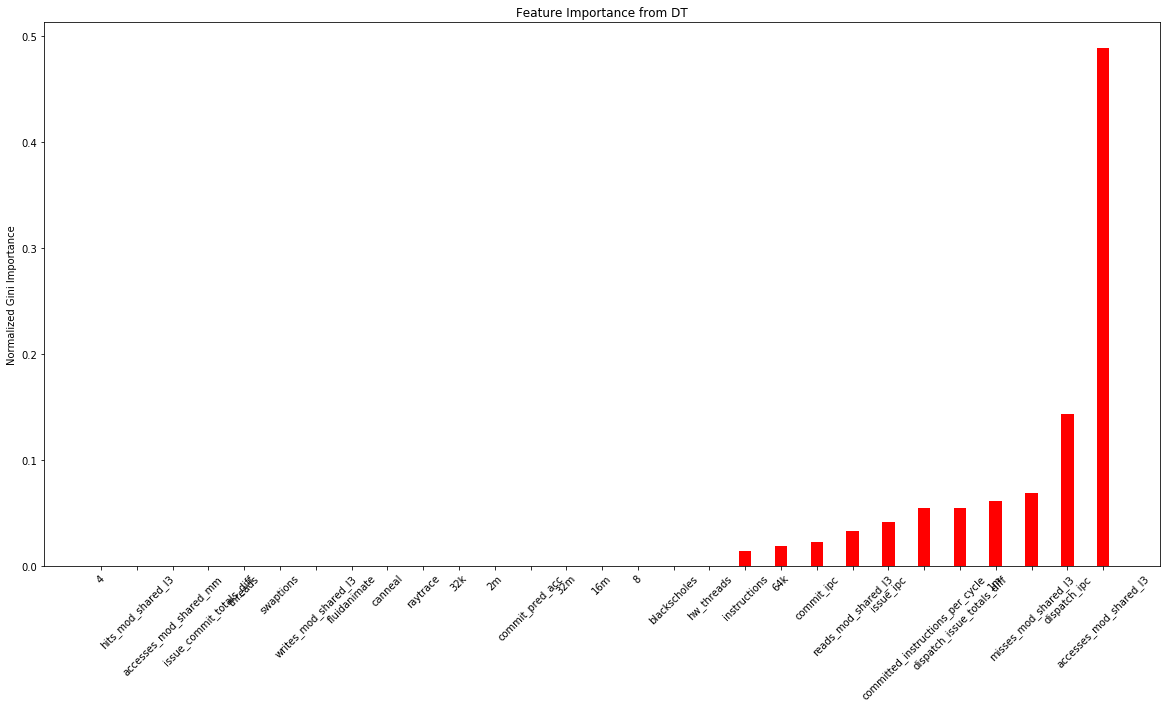

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

#Explicitly pull out the data we need
newdf = pd.DataFrame({'imp':tree.feature_importances_, 'feat':train_df.drop(label, 1).columns.values})
newdf = newdf.sort_values(by = 'imp', axis = 0)


fig, ax = plt.subplots(figsize=(20, 10))
width=0.35
ax.bar(np.arange(len(newdf.imp.values)), newdf.imp.values, width, color='r')
ax.set_xticks(np.arange(len(newdf.imp.values)))
ax.set_xticklabels(newdf.feat.values, rotation=45)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')


In [93]:
########save to csv
extract_csv.head(100)

,4,8,16m,32m,1m,2m,32k,64k,blackscholes,canneal,...,reads_mod_shared_l3,writes_mod_shared_l3,hw_threads,cycles,dispatch_ipc,issue_ipc,commit_ipc,commit_pred_acc,issue_commit_totals_diff,dispatch_issue_totals_diff
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.438479,-0.307876,0.0,5162965136,-1.058625,-1.068139,-1.068700,0.393163,0.247103,-0.105791
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,-0.264835,0.359078,0.0,13815380707,-1.071793,-1.084232,-1.084036,0.360986,1.474237,0.686997
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.246103,2.979554,0.0,31009448393,-1.070571,-1.116138,-1.119704,-0.075415,4.397301,4.707210
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.011838,1.763695,0.0,24088271698,-1.064734,-1.103769,-1.106900,0.009050,3.260521,3.163643
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.489985,-0.528429,0.0,1527718090,1.668937,1.669353,1.677408,-1.704375,-0.318184,-0.083424
5,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,-0.490114,-0.528426,0.0,1708237934,1.322765,1.324294,1.335508,-1.704375,-0.318136,-0.083642
6,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.490754,-0.528423,0.0,1524272911,1.675725,1.677083,1.684443,-1.702364,-0.318194,-0.083594
7,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,-0.491557,-0.528615,0.0,940791972,2.279150,2.183779,2.171968,-1.716442,-0.315873,0.014568
8,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,-0.490114,-0.528426,0.0,1708237934,1.322765,1.324294,1.335508,-1.704375,-0.318136,-0.083642
9,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.489985,-0.528429,0.0,1527718090,1.668937,1.669353,1.677408,-1.704375,-0.318184,-0.083424


In [94]:
extract_csv.rename(columns={"4": "width_val_4", "8": "width_val_8",
                            "16m": "l3cache_val_16m", "32m": "l3cache_val_32m",
                            "1m": "l2cache_val_1m", "2m": "l2cache_val_2m",
                            "32k": "l1cache_val_32k", "64k": "l1cache_val_64k"
                           }, inplace = True)

In [95]:
extract_csv = extract_csv.drop(columns=['threads','hw_threads'])

In [96]:
extract_csv.to_csv(r'/home/anthony/DS-GA 1006 Capstone/Simulator.csv', index = False, header=True)

# Detecting Multicollinearity Test
A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity.

In [97]:
multicollinearity_test_set = extract_csv.drop(['cycles'], axis=1)

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 


In [99]:
# calculating VIF for each feature 
vif_test = pd.DataFrame() 
vif_test["feature"] = multicollinearity_test_set.columns 
vif_test["VIF"] = [variance_inflation_factor(multicollinearity_test_set.values, i) 
                          for i in range(len(multicollinearity_test_set.columns))] 
  
print(vif_test)

                             feature           VIF
0                        width_val_4           inf
1                        width_val_8           inf
2                    l3cache_val_16m           inf
3                    l3cache_val_32m           inf
4                     l2cache_val_1m           inf
5                     l2cache_val_2m           inf
6                    l1cache_val_32k           inf
7                    l1cache_val_64k           inf
8                       blackscholes           inf
9                            canneal           inf
10                      fluidanimate           inf
11                          raytrace           inf
12                         swaptions           inf
13  committed_instructions_per_cycle  1.635964e+03
14                      instructions  1.871084e+05
15            accesses_mod_shared_mm           inf
16            accesses_mod_shared_l3           inf
17                hits_mod_shared_l3           inf
18              misses_mod_shar

/home/anthony/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Seeing what columns we can include without multicollinearity.

In [100]:
multicollinearity_test_set2 = pd.DataFrame()
multicollinearity_test_set2['instructions']= multicollinearity_test_set['instructions']
multicollinearity_test_set2['dispatch_ipc']= multicollinearity_test_set['dispatch_ipc']
multicollinearity_test_set2['width_val_4']= multicollinearity_test_set['width_val_4']
multicollinearity_test_set2['width_val_8']= multicollinearity_test_set['width_val_8']
#multicollinearity_test_set2['l3cache_val_16m']= multicollinearity_test_set['l3cache_val_16m']
#multicollinearity_test_set2['l3cache_val_32m']= multicollinearity_test_set['l3cache_val_32m']
#multicollinearity_test_set2['l2cache_val_1m']= multicollinearity_test_set['l2cache_val_1m']
#multicollinearity_test_set2['l2cache_val_2m']= multicollinearity_test_set['l2cache_val_2m']
#multicollinearity_test_set2['l1cache_val_32k']= multicollinearity_test_set['l1cache_val_32k']
#multicollinearity_test_set2['l1cache_val_64k']= multicollinearity_test_set['l1cache_val_64k']
# calculating VIF for each feature 
vif_test = pd.DataFrame() 
vif_test["feature"] = multicollinearity_test_set2.columns 
vif_test["VIF"] = [variance_inflation_factor(multicollinearity_test_set2.values, i) 
                          for i in range(len(multicollinearity_test_set2.columns))] 
  
print(vif_test)

        feature       VIF
0  instructions  1.177746
1  dispatch_ipc  1.014936
2   width_val_4  1.045316
3   width_val_8  1.146018
